# Project Title:

## Customer Purchase Behavior Analysis Using Big Data and Machine Learning

## Objective:

To analyze customer purchase patterns using a large dataset and apply machine learning models to 

predict future purchases, customer segmentation, and sales trends.

# Dataset

## The dataset contains 1 million+ records of customer transactions contains : 

#### Transaction_ID	

Customer_ID	Age	Gender	

Product_Category	

Purchase_Amount	Purchase_Date	

Payment_Method	

Store_Location	

Discount_Applied

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA

In [9]:
df = pd.read_csv('Big_data.csv')

In [10]:
df.head()

,Transaction_ID,Customer_ID,Age,Gender,Product_Category,Purchase_Amount,Purchase_Date,Payment_Method,Store_Location,Discount_Applied
0,1000000,1825,19,Female,Clothing,223.58,2024-04-03,Cash,New York,0
1,1000001,1536,31,Male,Books,44.85,2024-10-14,Cash,Phoenix,10
2,1000002,107,66,Male,Home & Kitchen,181.57,2025-01-16,Credit Card,Chicago,10
3,1000003,9892,34,Male,Home & Kitchen,284.98,2024-05-19,PayPal,Phoenix,5
4,1000004,1140,20,Male,Groceries,130.64,2024-03-07,PayPal,Los Angeles,10


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    100000 non-null  int64  
 1   Customer_ID       100000 non-null  int64  
 2   Age               100000 non-null  int64  
 3   Gender            100000 non-null  object 
 4   Product_Category  100000 non-null  object 
 5   Purchase_Amount   100000 non-null  float64
 6   Purchase_Date     100000 non-null  object 
 7   Payment_Method    100000 non-null  object 
 8   Store_Location    100000 non-null  object 
 9   Discount_Applied  100000 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 7.6+ MB


In [12]:
df.isna().sum()

Transaction_ID      0
Customer_ID         0
Age                 0
Gender              0
Product_Category    0
Purchase_Amount     0
Purchase_Date       0
Payment_Method      0
Store_Location      0
Discount_Applied    0
dtype: int64

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Transaction_ID,100000.0,1.050000e+06,28867.657797,1000000.0,1024999.75,1049999.500,1.074999e+06,1099999.00
Customer_ID,100000.0,4.999210e+03,2888.259123,1.0,2488.00,5012.500,7.500000e+03,10000.00
Age,100000.0,4.407455e+01,15.322284,18.0,31.00,44.000,5.700000e+01,70.00
Purchase_Amount,100000.0,2.195327e+02,228.666940,5.0,61.32,127.135,2.921425e+02,999.98
Discount_Applied,100000.0,9.997600e+00,7.065585,0.0,5.00,10.000,1.500000e+01,20.00


In [14]:
# Convert Purchase_Date to datetime
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])

In [15]:
df.head()

,Transaction_ID,Customer_ID,Age,Gender,Product_Category,Purchase_Amount,Purchase_Date,Payment_Method,Store_Location,Discount_Applied
0,1000000,1825,19,Female,Clothing,223.58,2024-04-03,Cash,New York,0
1,1000001,1536,31,Male,Books,44.85,2024-10-14,Cash,Phoenix,10
2,1000002,107,66,Male,Home & Kitchen,181.57,2025-01-16,Credit Card,Chicago,10
3,1000003,9892,34,Male,Home & Kitchen,284.98,2024-05-19,PayPal,Phoenix,5
4,1000004,1140,20,Male,Groceries,130.64,2024-03-07,PayPal,Los Angeles,10


In [16]:
# Create a new column for net purchase amount after discount
df['Net_Amount'] = df.apply(lambda row: row['Purchase_Amount'] * (1 - row['Discount_Applied']/100), axis=1)

In [17]:
df.head()

,Transaction_ID,Customer_ID,Age,Gender,Product_Category,Purchase_Amount,Purchase_Date,Payment_Method,Store_Location,Discount_Applied,Net_Amount
0,1000000,1825,19,Female,Clothing,223.58,2024-04-03,Cash,New York,0,223.580
1,1000001,1536,31,Male,Books,44.85,2024-10-14,Cash,Phoenix,10,40.365
2,1000002,107,66,Male,Home & Kitchen,181.57,2025-01-16,Credit Card,Chicago,10,163.413
3,1000003,9892,34,Male,Home & Kitchen,284.98,2024-05-19,PayPal,Phoenix,5,270.731
4,1000004,1140,20,Male,Groceries,130.64,2024-03-07,PayPal,Los Angeles,10,117.576


### Basic EDA: Plot total sales over time (monthly)

In [19]:
df['Month'] = df['Purchase_Date'].dt.to_period('M') #Create Monthly column

In [20]:
monthly_sales = df.groupby('Month')['Net_Amount'].sum().reset_index() #Group by Month

In [21]:
monthly_sales

,Month,Net_Amount
0,2024-02,7.693184e+05
1,2024-03,1.651981e+06
2,2024-04,1.624532e+06
3,2024-05,1.681171e+06
4,2024-06,1.640031e+06
5,2024-07,1.715512e+06
6,2024-08,1.686977e+06
7,2024-09,1.628744e+06
8,2024-10,1.645795e+06
9,2024-11,1.645447e+06


In [22]:
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

In [23]:
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       13 non-null     object 
 1   Net_Amount  13 non-null     float64
dtypes: float64(1), object(1)
memory usage: 340.0+ bytes


In [24]:
monthly_sales

,Month,Net_Amount
0,2024-02,7.693184e+05
1,2024-03,1.651981e+06
2,2024-04,1.624532e+06
3,2024-05,1.681171e+06
4,2024-06,1.640031e+06
5,2024-07,1.715512e+06
6,2024-08,1.686977e+06
7,2024-09,1.628744e+06
8,2024-10,1.645795e+06
9,2024-11,1.645447e+06


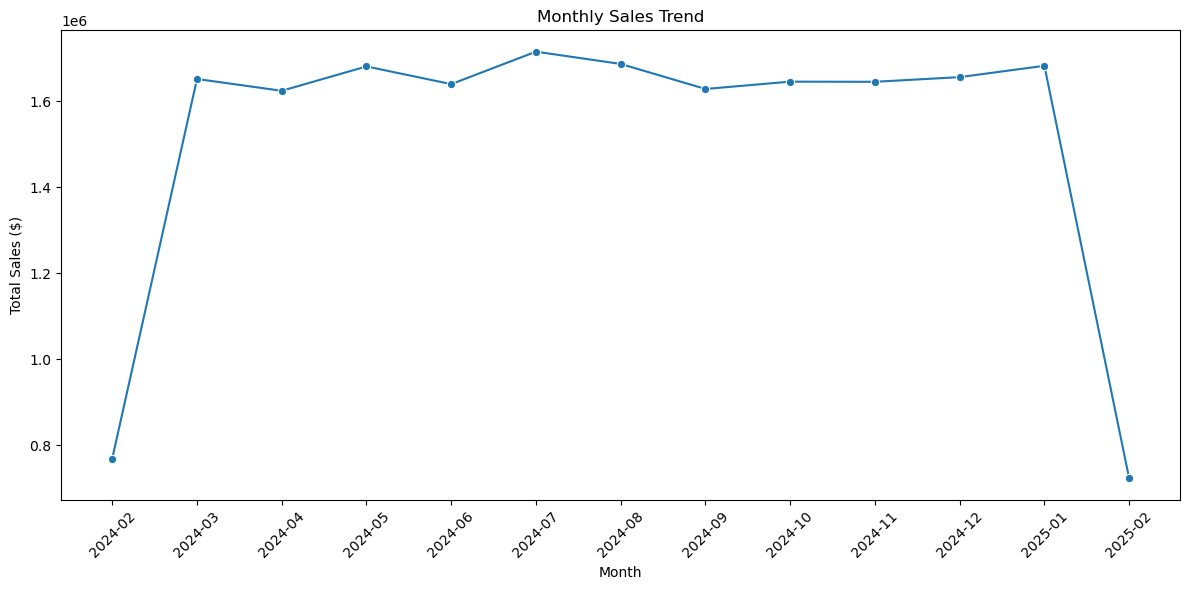

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Net_Amount', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Customer Segmentation using K-Means Clustering

### Let's create a customer summary dataset:

#### Total spending and number of transactions per customer

In [29]:
customer_df = df.groupby('Customer_ID').agg({
    'Net_Amount': 'sum',
    'Transaction_ID': 'count'
}).rename(columns={'Net_Amount': 'Total_Spending', 'Transaction_ID': 'Frequency'}).reset_index()

In [30]:
customer_df

,Customer_ID,Total_Spending,Frequency
0,1,3632.4775,13
1,2,486.8800,8
2,3,1714.2175,13
3,4,1323.6760,7
4,5,634.6200,6
...,...,...,...
9994,9996,861.3180,7
9995,9997,3319.6970,19
9996,9998,1507.4465,9
9997,9999,1636.5685,7


#### We can also add average spending per transaction

In [32]:
customer_df['Avg_Spending'] = customer_df['Total_Spending'] / customer_df['Frequency']

In [33]:
customer_df

,Customer_ID,Total_Spending,Frequency,Avg_Spending
0,1,3632.4775,13,279.421346
1,2,486.8800,8,60.860000
2,3,1714.2175,13,131.862885
3,4,1323.6760,7,189.096571
4,5,634.6200,6,105.770000
...,...,...,...,...
9994,9996,861.3180,7,123.045429
9995,9997,3319.6970,19,174.720895
9996,9998,1507.4465,9,167.494056
9997,9999,1636.5685,7,233.795500


In [34]:
print("\nCustomer summary head:")
print(customer_df.head())


Customer summary head:
   Customer_ID  Total_Spending  Frequency  Avg_Spending
0            1       3632.4775         13    279.421346
1            2        486.8800          8     60.860000
2            3       1714.2175         13    131.862885
3            4       1323.6760          7    189.096571
4            5        634.6200          6    105.770000


## Select features for clustering

In [36]:
X = customer_df[['Total_Spending', 'Frequency', 'Avg_Spending']]

## Normalize features (optional for better clustering performance)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Run K-Means (choose k=4 clusters for this example)

In [41]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(X_scaled)

## Visualize clusters

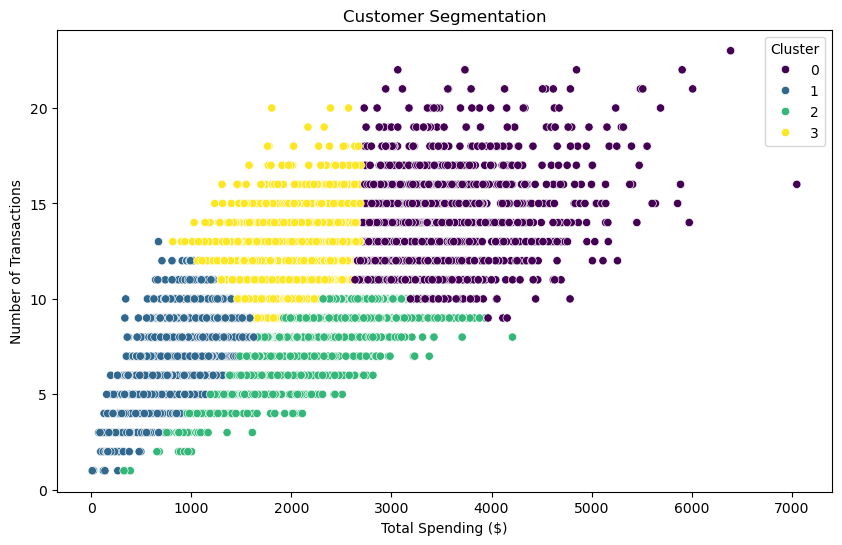

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_df, x='Total_Spending', y='Frequency', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Spending ($)')
plt.ylabel('Number of Transactions')
plt.show()

# 4. Sales Forecasting using ARIMA

### For a simple forecasting example, aggregate daily sales

In [46]:
daily_sales = df.groupby(df['Purchase_Date'].dt.date)['Net_Amount'].sum().reset_index()

In [47]:
daily_sales.columns = ['Date', 'Sales']

In [48]:
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])

In [49]:
daily_sales = daily_sales.sort_values('Date')

In [50]:
daily_sales.set_index('Date', inplace=True)

<Figure size 1200x600 with 0 Axes>

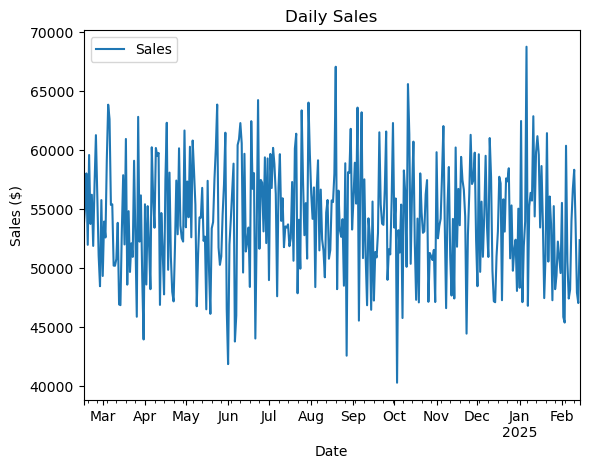

In [51]:
# Plot daily sales
plt.figure(figsize=(12,6))
daily_sales.plot()
plt.title('Daily Sales')
plt.ylabel('Sales ($)')
plt.show()

### Fit ARIMA model (using a simple (1,1,1) configuration for demonstration)

### In practice, use ACF, PACF and model selection criteria to choose parameters

In [54]:
model = ARIMA(daily_sales['Sales'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  365
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3635.365
Date:                Sat, 15 Feb 2025   AIC                           7276.730
Time:                        23:45:27   BIC                           7288.421
Sample:                    02-16-2024   HQIC                          7281.377
                         - 02-14-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0908      0.047      1.922      0.055      -0.002       0.183
ma.L1         -0.9966      0.024    -41.658      0.000      -1.044      -0.950
sigma2      3.013e+07   3.95e-10   7.63e+16      0.0

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## Forecast next 30 days

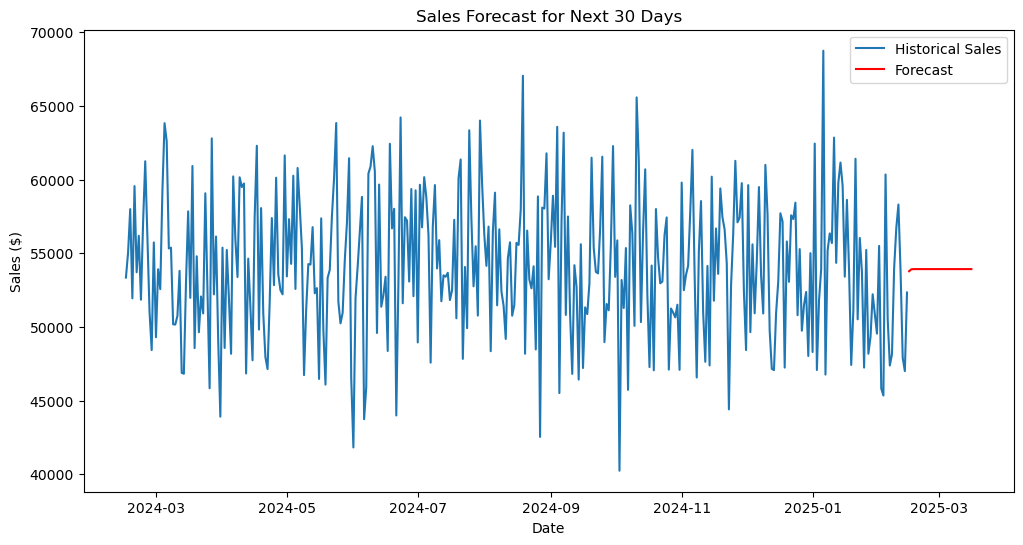

In [56]:
forecast = model_fit.forecast(steps=30)
plt.figure(figsize=(12,6))
plt.plot(daily_sales.index, daily_sales['Sales'], label='Historical Sales')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Sales Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()

# MACHINE LEARNING 

In [192]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import janitor

In [59]:
# For visualization of trees:
import pydotplus
from IPython.display import Image

In [60]:
df = pd.read_csv('Big_dataML.csv')

In [61]:
df.head()

,Transaction_ID,Customer_ID,Age,Gender,Product_Category,Purchase_Amount,Purchase_Date,Payment_Method,Store_Location,Discount_Applied
0,1000000,1825,19,Female,Clothing,223.58,2024-05-18,Cash,New York,0
1,1000001,1536,31,Male,Books,44.85,2024-10-15,Cash,Phoenix,10
2,1000002,107,66,Male,Home & Kitchen,181.57,2025-01-14,Credit Card,Chicago,10
3,1000003,9892,34,Male,Home & Kitchen,284.98,2024-10-23,PayPal,Phoenix,5
4,1000004,1140,20,Male,Groceries,130.64,2024-03-05,PayPal,Los Angeles,10


In [62]:
df.shape

(100000, 10)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    100000 non-null  int64  
 1   Customer_ID       100000 non-null  int64  
 2   Age               100000 non-null  int64  
 3   Gender            100000 non-null  object 
 4   Product_Category  100000 non-null  object 
 5   Purchase_Amount   100000 non-null  float64
 6   Purchase_Date     100000 non-null  object 
 7   Payment_Method    100000 non-null  object 
 8   Store_Location    100000 non-null  object 
 9   Discount_Applied  100000 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 7.6+ MB


In [64]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Transaction_ID,100000.0,1.050000e+06,28867.657797,1000000.0,1024999.75,1049999.500,1.074999e+06,1099999.00
Customer_ID,100000.0,4.999210e+03,2888.259123,1.0,2488.00,5012.500,7.500000e+03,10000.00
Age,100000.0,4.407455e+01,15.322284,18.0,31.00,44.000,5.700000e+01,70.00
Purchase_Amount,100000.0,2.195327e+02,228.666940,5.0,61.32,127.135,2.921425e+02,999.98
Discount_Applied,100000.0,9.997600e+00,7.065585,0.0,5.00,10.000,1.500000e+01,20.00


## 5. Machine Learning Analysis: Decision Tree & Random Forest

#### We'll predict two things using the transaction data:

#### (a) Regression: Predict the Net_Amount based on customer demographics and transaction details.

#### (b) Classification: Classify if a transaction is from a "high spender" customer (Net_Amount above median).

### For this, we'll select features and create dummy variables for categorical fields.

In [148]:
features = ['Age', 'Gender', 'Product_Category', 'Payment_Method', 'Store_Location', 'Discount_Applied']
df_ml = df[features + ['Net_Amount']].copy()

### Create a classification target: 1 if Net_Amount > median, else 0

In [151]:
median_net = df_ml['Net_Amount'].median()
df_ml['High_Spender'] = (df_ml['Net_Amount'] > median_net).astype(int)

In [153]:
# One-hot encoding for categorical variables
df_ml = pd.get_dummies(df_ml, columns=['Gender', 'Product_Category', 'Payment_Method', 'Store_Location'], drop_first=True)

In [155]:
df_ml.head()

,Age,Discount_Applied,Net_Amount,High_Spender,Gender_Male,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Home & Kitchen,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_PayPal,Store_Location_Houston,Store_Location_Los Angeles,Store_Location_New York,Store_Location_Phoenix
0,19,0,223.580,1,False,True,False,False,False,False,False,False,False,False,True,False
1,31,10,40.365,0,True,False,False,False,False,False,False,False,False,False,False,True
2,66,10,163.413,1,True,False,False,False,True,True,False,False,False,False,False,False
3,34,5,270.731,1,True,False,False,False,True,False,False,True,False,False,False,True
4,20,10,117.576,1,True,False,False,True,False,False,False,True,False,True,False,False


### Separate features and targets`3

In [160]:
X = df_ml.drop(columns=['Net_Amount', 'High_Spender'])
y_reg = df_ml['Net_Amount'] # Target for the Regressor
y_clf = df_ml['High_Spender'] # Target for the Classifier

### Split data into training and testing sets (using 70/30 split)

In [165]:
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.3, random_state=42) #Split for Regressor
X_train_clf, X_test_clf, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.3, random_state=42) #Split for Classifier

# (A) Decision Tree Models

In [169]:
# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)

In [171]:
dt_reg.fit(X_train, y_reg_train)

DecisionTreeRegressor(random_state=42)

In [173]:
y_reg_pred = dt_reg.predict(X_test)

In [175]:
mse_dt = mean_squared_error(y_reg_test, y_reg_pred)
print("\nDecision Tree Regressor MSE:", mse_dt)


Decision Tree Regressor MSE: 26938.27120531381


### Visualize the Decision Tree (for regressor, for example)

In [196]:
dot_data = export_graphviz(dt_reg, out_file=None, 
                           feature_names=X.columns,
                           filled=True, rounded=True,  
                           special_characters=True,
                           max_depth=3)  # limiting depth for readability

In [200]:
# Clean feature names by replacing special characters
clean_feature_names = [name.replace("&", "and") for name in X.columns]

In [204]:
dot_data = export_graphviz(
    dt_reg, 
    out_file=None, 
    feature_names=clean_feature_names,
    filled=True, 
    rounded=True,  
    special_characters=True,
    max_depth=3  # limiting depth for readability
)

In [206]:
print(dot_data)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<Product_Category_Electronics &le; 0.5<br/>squared_error = 42981.956<br/>samples = 70000<br/>value = 197.505>, fillcolor="#fae7d9"] ;
1 [label=<Product_Category_Home and Kitchen &le; 0.5<br/>squared_error = 11248.862<br/>samples = 55966<br/>value = 122.315>, fillcolor="#fcf0e7"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<Product_Category_Clothing &le; 0.5<br/>squared_error = 4187.866<br/>samples = 42104<br/>value = 85.461>, fillcolor="#fdf5ef"] ;
1 -> 2 ;
3 [label=<Product_Category_Groceries &le; 0.5<br/>squared_error = 1159.184<br/>samples = 28142<br/>value = 58.481>, fillcolor="#fef8f4"] ;
2 -> 3 ;
4 [label="(...)", fillcolor="#C0C0C0"] ;
3 -> 4 ;
15527 [label="(...)", fillcolor="#C0C0C0"] ;
3 -> 15527 ;
31060 [label=<Discount_Applied &le; 7.5<br/>squared_error = 5868.068<br/>samples = 13962<br/>value = 139.842>, fillcol

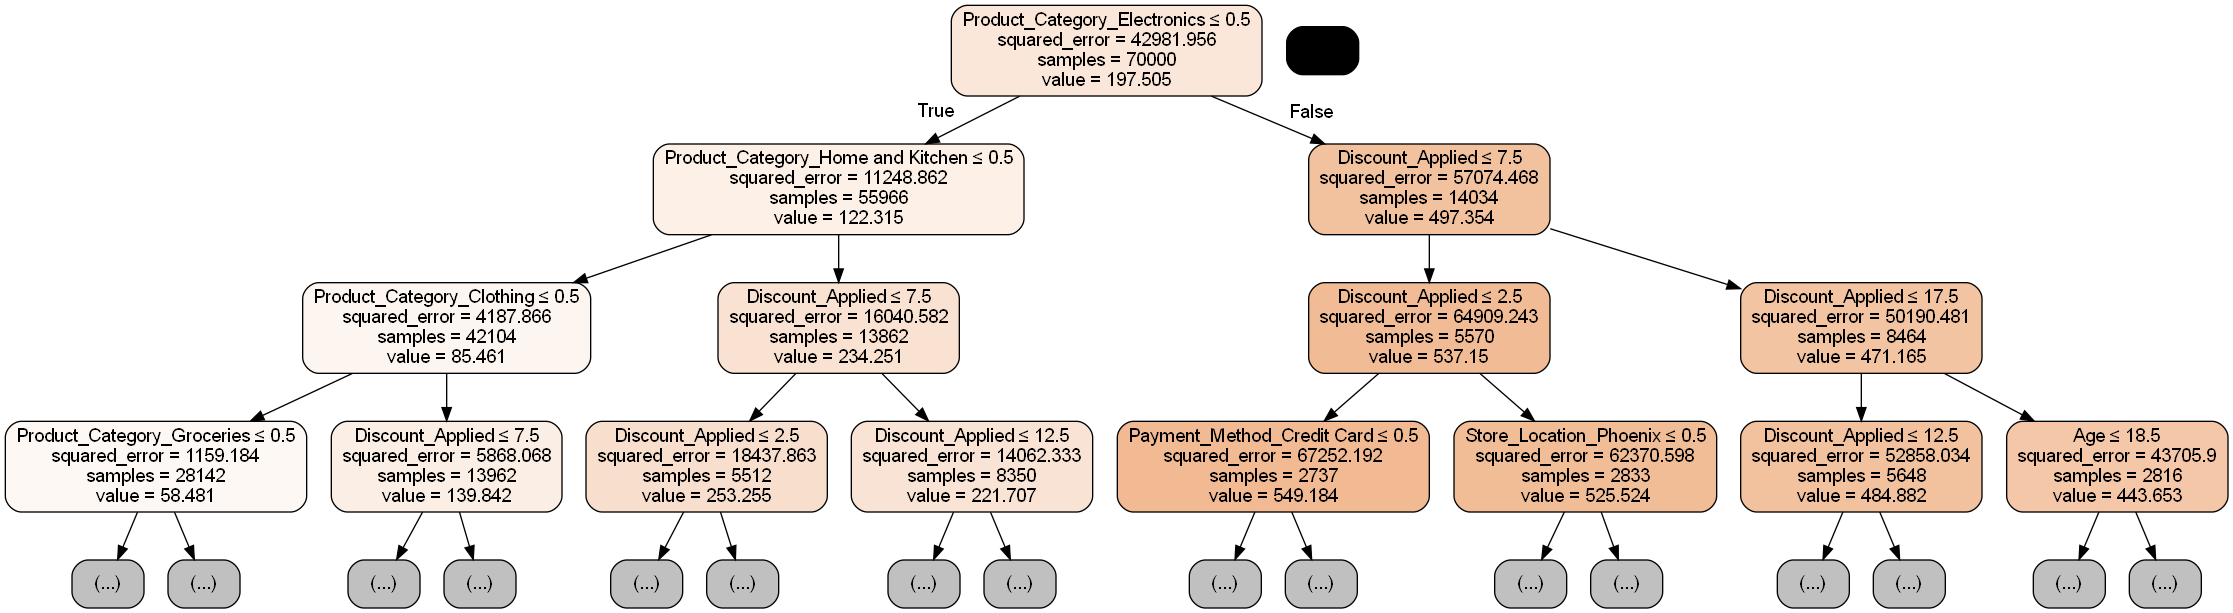

In [208]:
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("decision_tree_regressor.png")

try:
    display(Image(graph.create_png()))
except Exception as e:
    print("Tree visualization saved as 'decision_tree_regressor.png'.", e)

In [210]:
# Get feature importances from the decision tree regressor
importances = dt_reg.feature_importances_
features = X.columns

In [212]:
# Create a DataFrame for easy plotting
fi_df = pd.DataFrame({
    'feature': features,
    'importance': importances
})

In [214]:
# Sort the DataFrame by importance (descending order)
fi_df = fi_df.sort_values(by='importance', ascending=False)

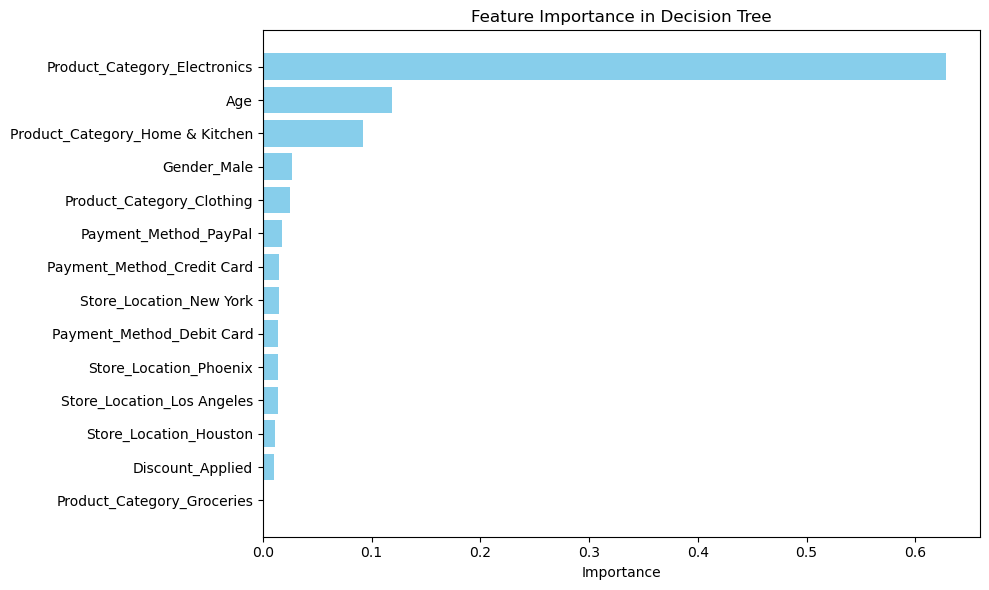

In [216]:
# Plot the feature importances using a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(fi_df['feature'], fi_df['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance on top
plt.tight_layout()
plt.show()

# (B) Random Forest Models

### Random Forest Regressor

In [220]:
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)

In [222]:
rf_reg.fit(X_train, y_reg_train)
y_rf_reg_pred = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_reg_test, y_rf_reg_pred)
print("\nRandom Forest Regressor MSE:", mse_rf)


Random Forest Regressor MSE: 20546.282484221825


### Feature_Importances

In [225]:
importances = rf_reg.feature_importances_
features = X.columns

In [228]:
# Create a DataFrame for easy plotting
fi_df = pd.DataFrame({
    'feature': features,
    'importance': importances
})

In [230]:
# Sort the DataFrame by importance (descending order)
fi_df = fi_df.sort_values(by='importance', ascending=False)

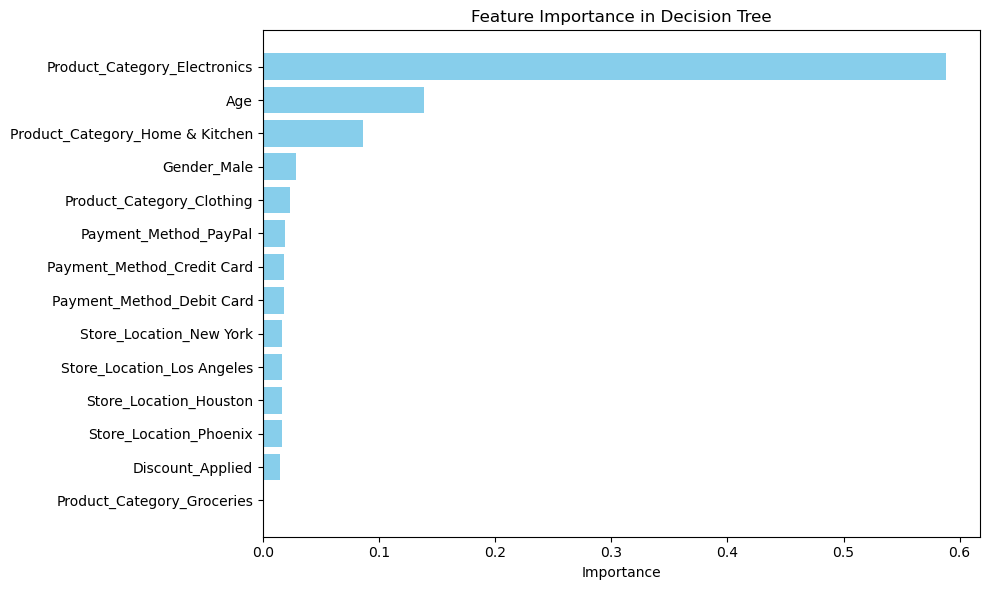

In [232]:
# Plot the feature importances using a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(fi_df['feature'], fi_df['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance on top
plt.tight_layout()
plt.show()

## Random Forest Classifier

In [234]:
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)

In [236]:
rf_clf.fit(X_train_clf, y_clf_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [238]:
y_rf_clf_pred = rf_clf.predict(X_test_clf)

In [240]:
y_rf_clf_pred

array([1, 1, 1, ..., 1, 1, 1])

In [242]:
acc_rf = accuracy_score(y_clf_test, y_rf_clf_pred)
print("Random Forest Classifier Accuracy:", acc_rf)
print("Classification Report:\n", classification_report(y_clf_test, y_rf_clf_pred))

Random Forest Classifier Accuracy: 0.7912
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79     14948
           1       0.79      0.80      0.79     15052

    accuracy                           0.79     30000
   macro avg       0.79      0.79      0.79     30000
weighted avg       0.79      0.79      0.79     30000



### Visualize one tree from the random forest (e.g., first tree)

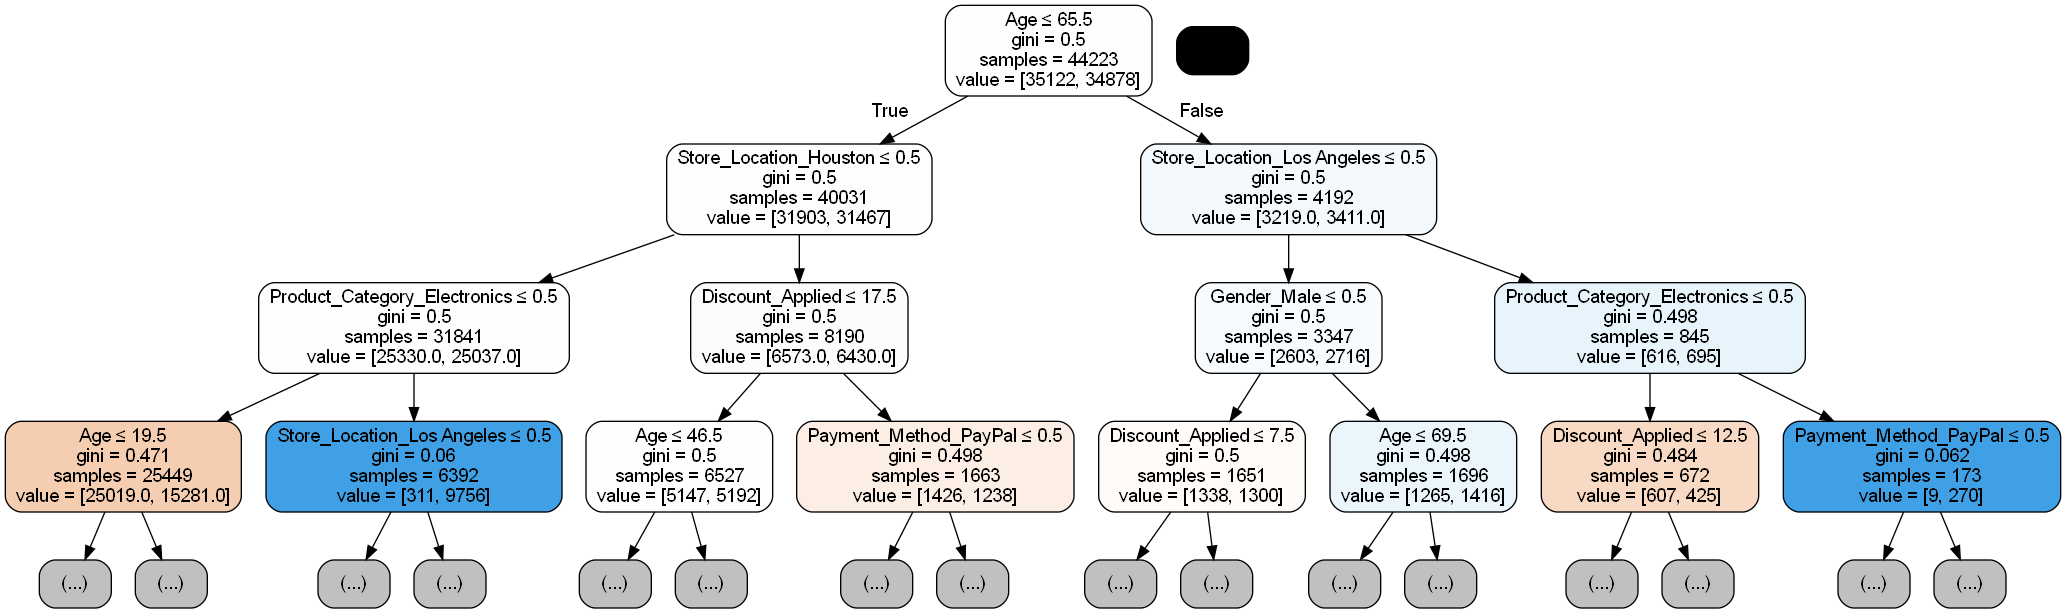

Machine learning analysis with Decision Trees and Random Forest models completed!


In [245]:
estimator = rf_clf.estimators_[0]
dot_data_rf = export_graphviz(estimator, out_file=None, 
                              feature_names=X.columns,
                              filled=True, rounded=True,
                              special_characters=True,
                              max_depth=3)
graph_rf = pydotplus.graph_from_dot_data(dot_data_rf)
graph_rf.write_png("random_forest_tree.png")
try:
    display(Image(graph_rf.create_png()))
except Exception as e:
    print("Random Forest tree visualization saved as 'random_forest_tree.png'.", e)

print("Machine learning analysis with Decision Trees and Random Forest models completed!")

## Feature Importances for Random Forest Classifier

In [248]:
importances = rf_clf.feature_importances_
features = X.columns

In [250]:
# Create a DataFrame for easy plotting
clf_df = pd.DataFrame({
    'feature': features,
    'importance': importances
})

In [252]:
# Sort the DataFrame by importance (descending order)
clf_df = clf_df.sort_values(by='importance', ascending=False)

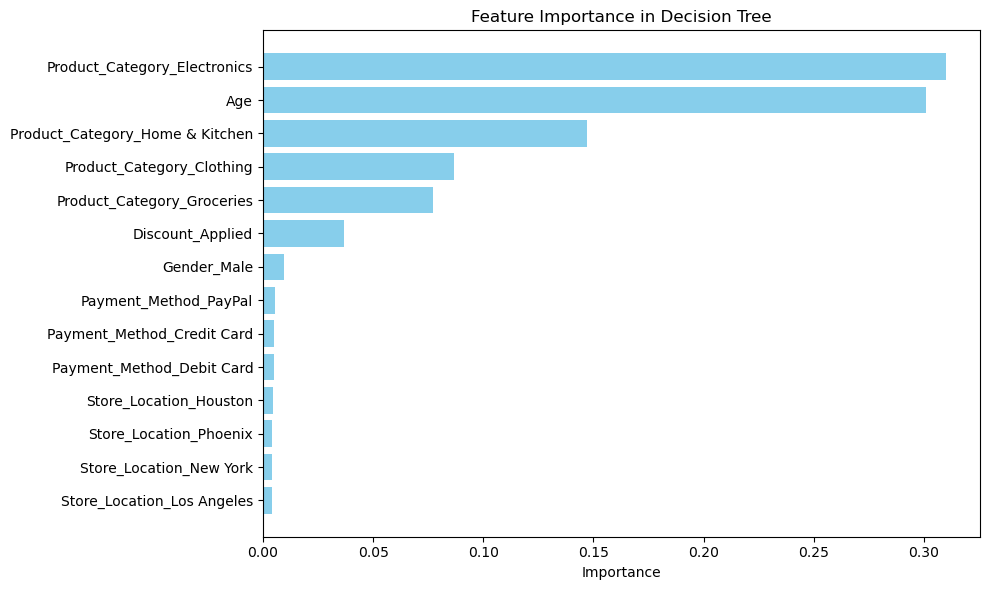

In [254]:
# Plot the feature importances using a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(clf_df['feature'], clf_df['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance on top
plt.tight_layout()
plt.show()